In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [190]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


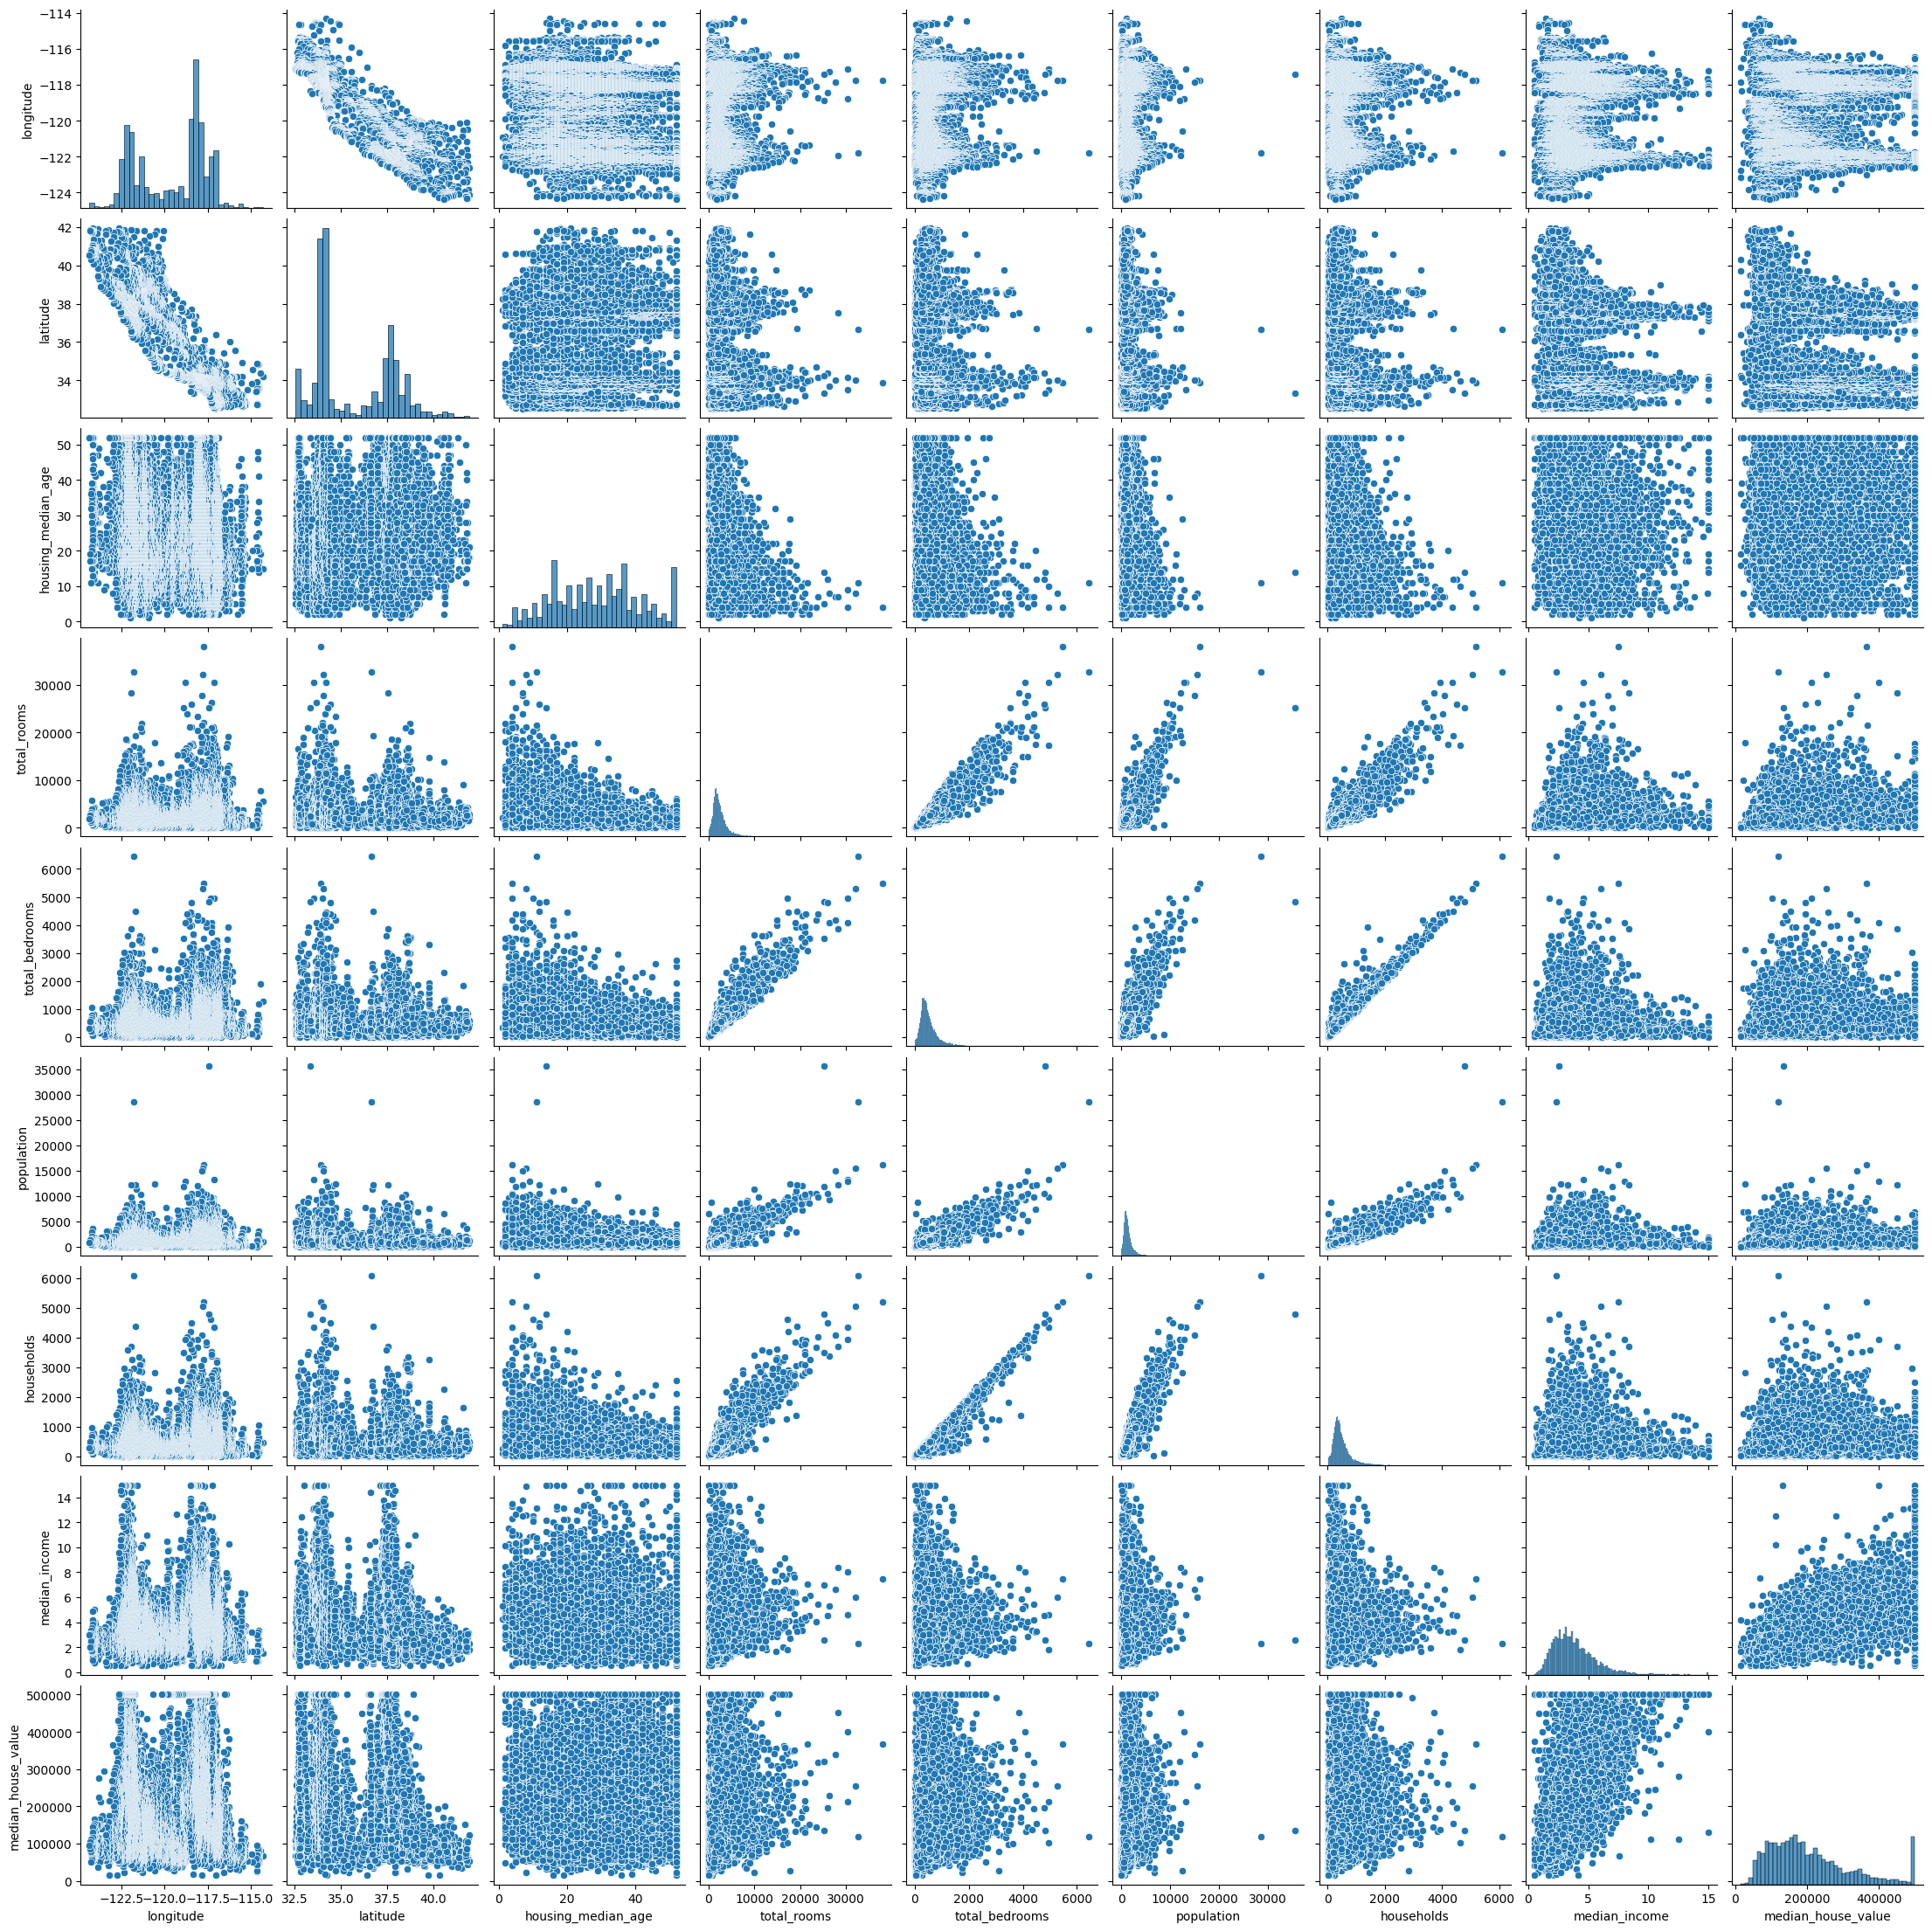

In [191]:
import seaborn as sns
sns.pairplot(df)

In [192]:
df.shape

(17000, 9)

In [193]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [194]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=42)

In [195]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
model=XGBRegressor()

model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [196]:
model=XGBRegressor(random_state=42)

param_grid={
    'n_estimators':[10,50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[4,8,16],
    'early_stopping_rounds':[10]
}

fit_params={
    'eval_set':[(X_cv,y_cv)],
    'verbose':False
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train,**fit_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'early_stopping_rounds': [10],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 8, 16],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [197]:
print(grid_search.best_params_)

{'early_stopping_rounds': 10, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}


In [198]:
model=XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    early_stopping_rounds=10
)
model.fit(X_train,y_train,**fit_params)
model.score(X_train,y_train)
print(r2_score(y_train,model.predict(X_train)))
cv_pred=model.predict(X_cv)
print(r2_score(y_cv,cv_pred))

0.9749280473144644
0.8416956826880496


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

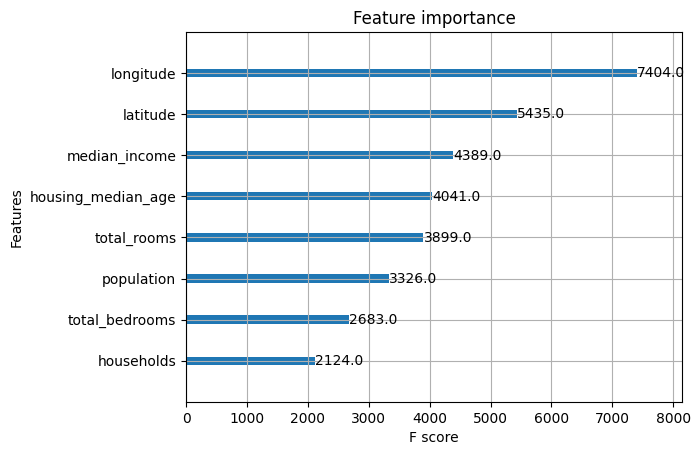

In [199]:
from xgboost import plot_importance
plot_importance(model)

In [200]:
df_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [201]:
X_test=df_test.drop('median_house_value',axis=1)
y_test=df_test['median_house_value']

In [202]:
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))

0.817325125028985


In [204]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

📏 Evaluation Metrics:
MAE  = 31054.46
MSE  = 2336740162.17
RMSE = 48339.84
R²   = 0.82


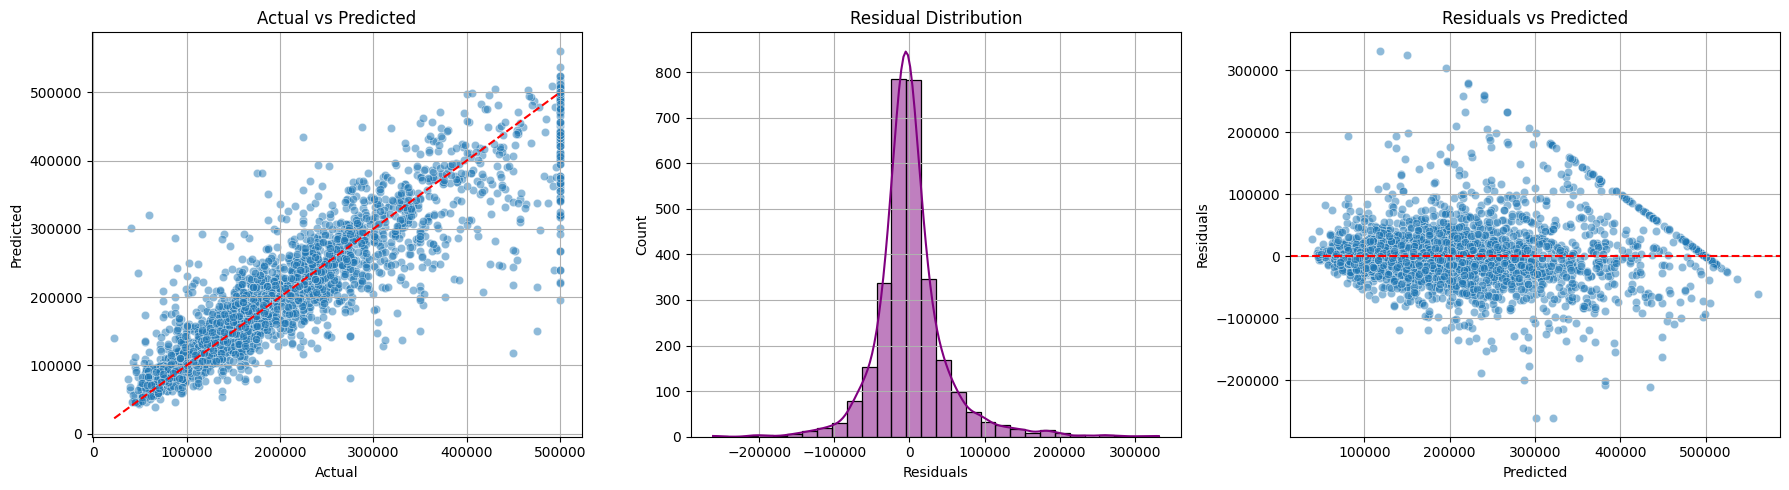

In [205]:
evaluate_regression(y_test, y_pred)

# Another Model (not good on test data)

In [148]:
df_new=df.copy()

In [149]:
target='median_house_value'

In [150]:
df_new['rooms_per_household'] = df['total_rooms'] / df['households']
df_new['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df_new['population_per_household'] = df['population'] / df['households']

In [151]:
features = [
    'longitude', 'latitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population', 'households',
    'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

In [152]:
X=df_new[features]
y=df_new[target]

In [159]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [161]:
preprocessor=ColumnTransformer(
        [('num',StandardScaler(),features)],
).set_output(transform='pandas')

In [162]:
model=XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    early_stopping_rounds=10,
    eval_metric='rmse',
)

In [163]:
pipe=Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)
])

In [167]:
pipe.fit(X_train,y_train,model__eval_set=[(pipe.named_steps['preprocessor'].transform(X_cv),y_cv)],model__verbose=False)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              cols...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [169]:
y_pred=pipe.predict(X_train)
print(r2_score(y_train,y_pred))
y_pred=pipe.predict(X_cv)
print(r2_score(y_cv,y_pred))

0.9807880119745558
0.8468689268897134


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

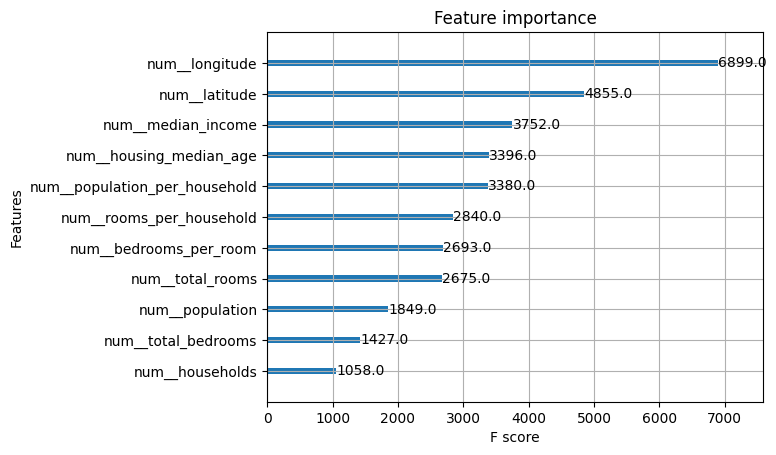

In [170]:
from xgboost import plot_importance
plot_importance(model)

📏 Evaluation Metrics:
MAE  = 51691.84
MSE  = 5089212178.13
RMSE = 71338.71
R²   = 0.60


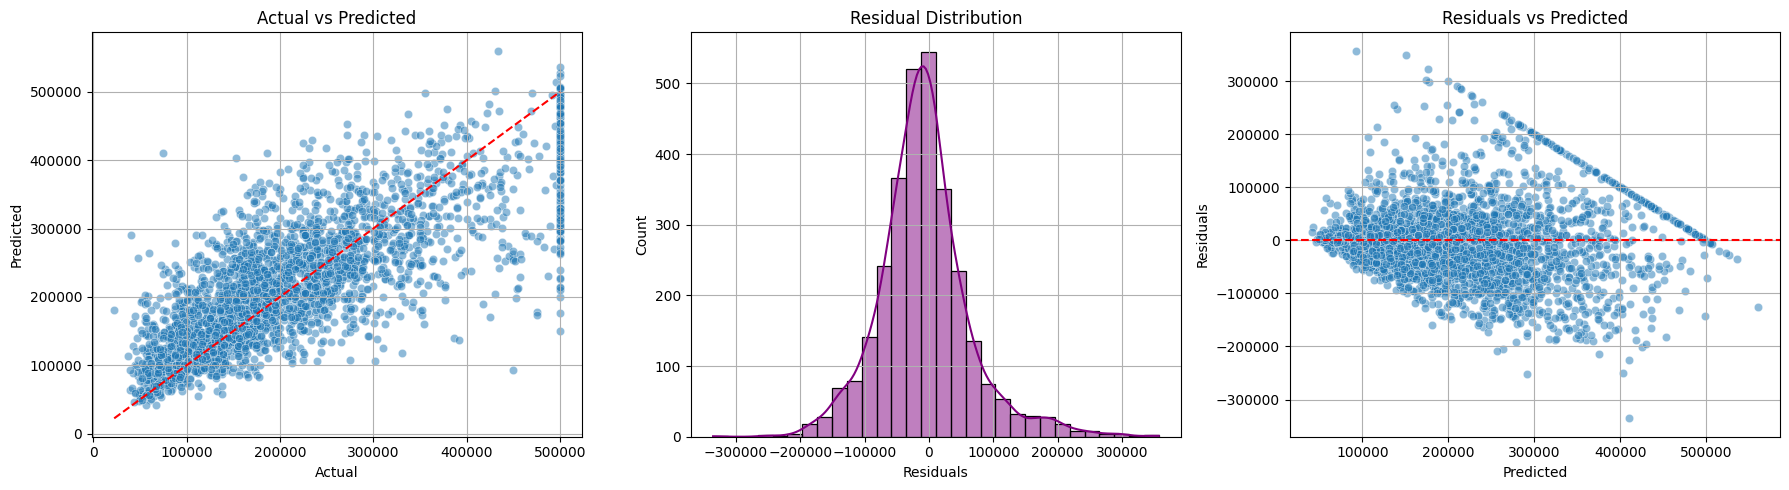

In [173]:
df_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

df_test['rooms_per_household'] = df['total_rooms'] / df['households']
df_test['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df_test['population_per_household'] = df['population'] / df['households']

X_test=df_test.drop('median_house_value',axis=1)
y_test=df_test['median_house_value']
y_pred=pipe.predict(X_test)
evaluate_regression(y_test, y_pred)